In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
stock_data=pd.read_csv("stock_price.csv")

def clean_percentage(change):
    if isinstance(change, str):  # Check if the value is a string
        return float(change.replace('%', ''))
    return change  # Return the original value if it's already numeric or NaN

stock_data['Change'] = stock_data['Change'].apply(clean_percentage)

def convert_volume(volume):
    if isinstance(volume, str):  # Check if the value is a string
        volume = volume.strip()  # Remove leading/trailing spaces
        if 'B' in volume:
            return float(volume.replace('B', '')) * 1e9  # Convert billions
        elif 'M' in volume:
            return float(volume.replace('M', '')) * 1e6  # Convert millions
    elif isinstance(volume, (float, int)):
        return volume  # Return if it's already a numeric type
    return np.nan  # Return NaN for anything unexpected

# Apply the function to the Volume column
stock_data['Volume'] = stock_data['Volume'].apply(convert_volume)
df = stock_data.iloc[::-1]
df

,Date,Close,Open,High,Low,Volume,Change
9201,12-02-1987,182.4,182.4,182.4,182.4,1.280000e+09,16.25
9200,13-02-1987,172.5,176.5,176.5,172.5,4.223800e+08,-5.43
9199,16-02-1987,175.5,166.7,175.5,165.7,3.605100e+08,1.74
9198,17-02-1987,182.4,176.5,184.3,175.5,8.815100e+08,3.93
9197,18-02-1987,191.2,186.3,191.2,186.3,7.950900e+08,4.82
...,...,...,...,...,...,...,...
4,26-07-2024,157.9,159.3,159.6,157.9,1.550800e+08,-0.13
3,29-07-2024,159.7,158.7,160.2,158.4,1.262800e+08,1.14
2,30-07-2024,158.7,158.8,159.2,158.0,1.381400e+08,-0.63
1,31-07-2024,160.4,158.2,160.7,158.1,1.739100e+08,1.07


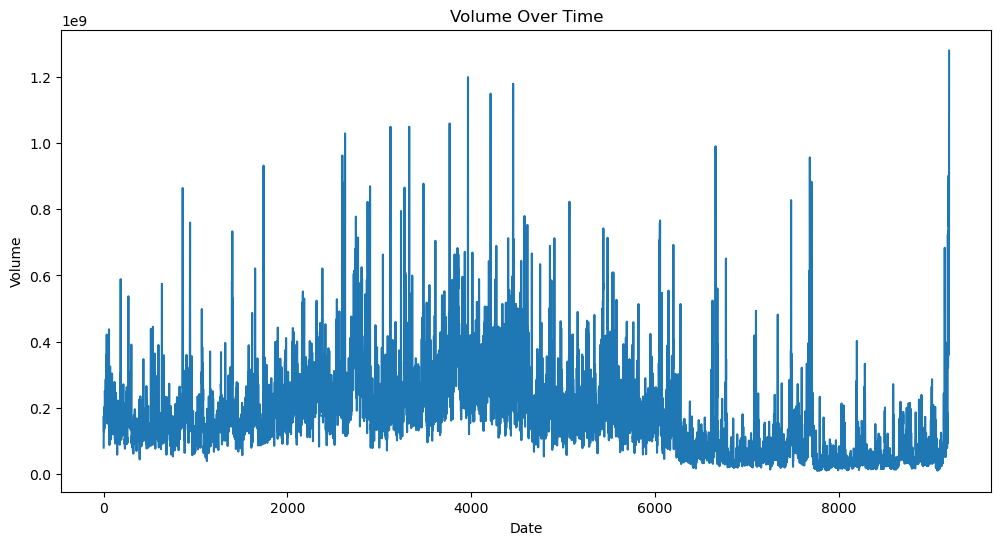

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'])
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

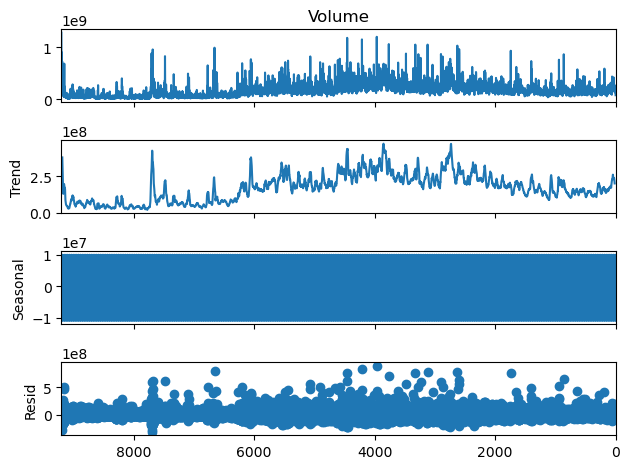

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Volume'], model='additive', period=30)  # Adjust the period based on your data

# Plot the decomposed components
decomposition.plot()
plt.show()

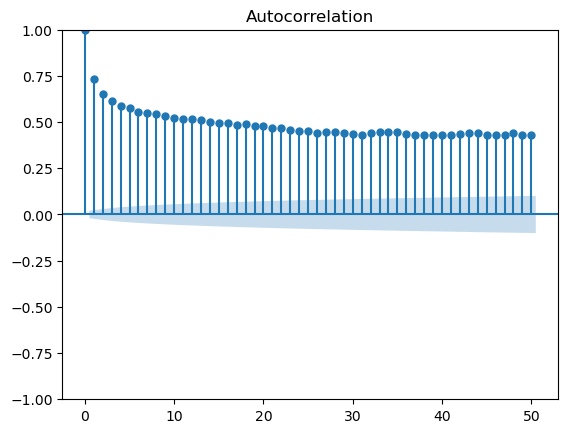

In [55]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation of volume data
plot_acf(df['Volume'], lags=50)
plt.show()

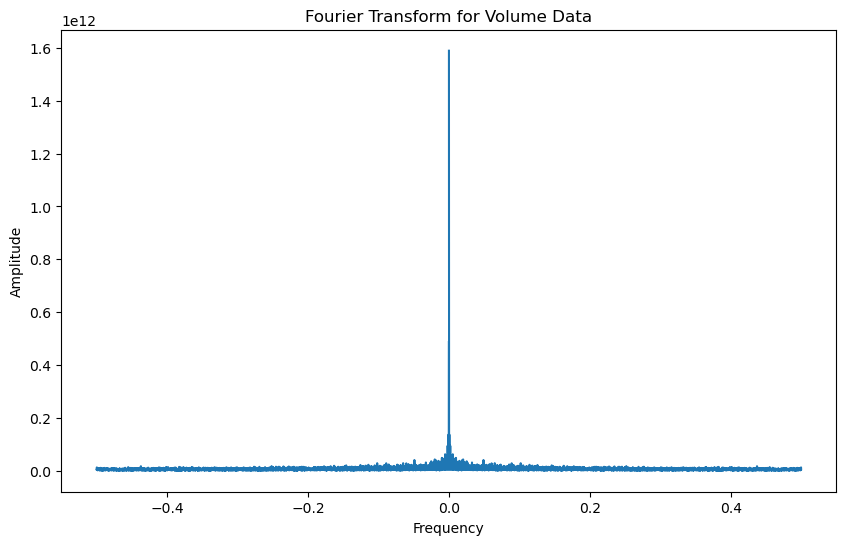

In [56]:
import numpy as np
from scipy.fftpack import fft

# Check if 'Volume' exists in the dataframe
if 'Volume' in df.columns:
    # Convert 'Volume' to a NumPy array and drop any NaN values
    volume_data = df['Volume'].dropna().values
    
    # Apply Fourier Transform
    fft_vals = fft(volume_data)
    
    # Get the corresponding frequencies
    frequencies = np.fft.fftfreq(len(fft_vals))

    # Plot the Fourier Transform results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.plot(frequencies, np.abs(fft_vals))
    plt.title('Fourier Transform for Volume Data')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.show()
else:
    print("The 'Volume' column does not exist in the DataFrame.")


Correlation between Volume and Closing Price: -0.3175082210565922


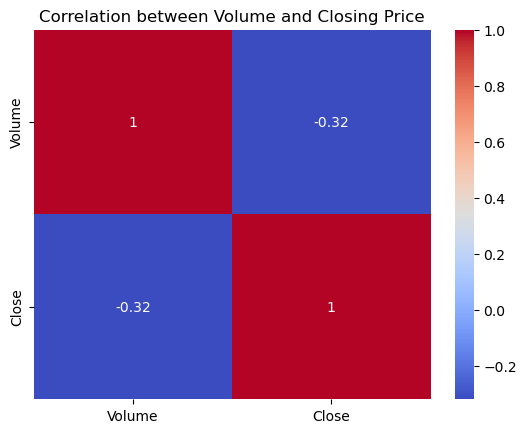

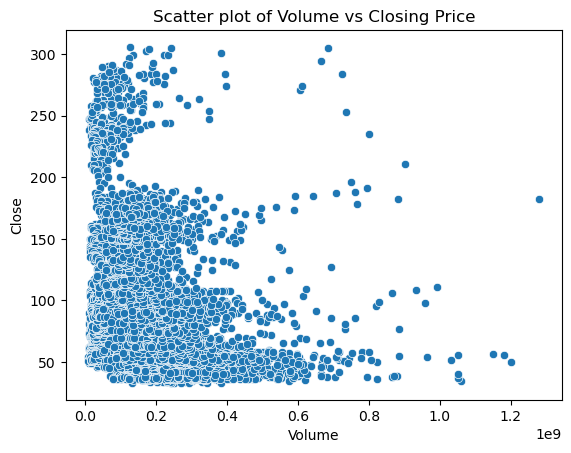

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'Volume' and 'Close' columns

# Calculate the correlation matrix
correlation = df[['Volume', 'Close']].corr()

# Display the correlation value between 'Volume' and 'Close'
print(f"Correlation between Volume and Closing Price: {correlation.loc['Volume', 'Close']}")

# Optionally, visualize the correlation with a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Volume and Closing Price')
plt.show()

# Scatter plot to visualize relationship
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title('Scatter plot of Volume vs Closing Price')
plt.show()


In [58]:
pip install sea

In [7]:
from sklearn.model_selection import train_test_split

# Load your stock prices dataset


# Split the data into train and test sets (e.g., 80% train, 20% test)
train_df, test_df = train_test_split(stock_data, test_size=0.2, random_state=42)

# Save the train and test data into separate CSV files
train_df.to_csv('train_stock_price.csv', index=False)
test_df.to_csv('test_stock_price.csv', index=False)
train_df

,Date,Close,Open,High,Low,Volume,Change
8873,10-06-1988,244.1,244.1,246.1,242.2,224550000.0,1.62
4855,27-09-2004,43.5,44.1,44.2,43.4,166000000.0,-0.91
5193,15-05-2003,44.6,45.2,45.5,44.2,201280000.0,-2.41
6886,27-06-1996,81.4,81.9,82.0,81.4,36200000.0,-0.97
3910,31-07-2008,55.3,53.6,55.9,53.4,554520000.0,3.95
...,...,...,...,...,...,...,...
5734,02-03-2001,74.9,76.0,76.5,74.1,176480000.0,-3.97
5191,19-05-2003,43.2,44.3,44.3,43.0,124610000.0,-1.82
5390,24-07-2002,47.4,48.3,48.3,47.2,182700000.0,-2.87
860,28-01-2021,106.2,104.7,107.4,104.7,864590000.0,-1.48


In [9]:
stock_train=train_df.iloc[:,2:3].values
stock_train.shape

(7361, 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_stock_train=scaler.fit_transform(stock_train)
scaled_stock_train

array([[0.76264451],
       [0.04010116],
       [0.04407514],
       ...,
       [0.05527457],
       [0.25903179],
       [0.17593931]])

In [13]:
x_train=[]
y_train=[]
for i in range(400,7361):
    x_train.append(scaled_stock_train[i-400:i,0])
    y_train.append(scaled_stock_train[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)


(6961, 400)
(6961,)


In [14]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(6961, 400, 1)

In [15]:
#building model using keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [17]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=1,batch_size=32)

218/218 [==============================] - 178s 761ms/step - loss: 0.0348


In [19]:
stock_data_test=pd.read_csv("test_stock_price.csv")

actual_stock_price=stock_data_test.iloc[:,2:3].values
actual_stock_price

array([[120. ],
       [ 66. ],
       [ 66.8],
       ...,
       [ 38.6],
       [ 55.8],
       [130.1]])

In [41]:
stock_data_total=stock_data['Open']
inputs=stock_data_total[len(stock_data_total)-len(stock_data_test)-400:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for i in range(400,600):
    x_test.append(inputs[i-400:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

IndexError: tuple index out of range

In [38]:
predicted_stock_price=regressor.predict(x_test)

7/7 [==============================] - 1s 208ms/step


In [40]:
predicted_stock_price.shape

(200, 400, 1)

In [33]:
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[3971371.8],
       [4643126.5],
       [5188591. ],
       [5629621.5],
       [5984527. ],
       [6268753.5],
       [6495301. ],
       [6675039. ],
       [6817012. ],
       [6928703. ],
       [7016263.5],
       [7084706.5],
       [7138084.5],
       [7179672. ],
       [7212086. ],
       [7237413.5],
       [7257303. ],
       [7273051.5],
       [7285635. ],
       [7295779. ],
       [7304030.5],
       [7310801. ],
       [7316415.5],
       [7321121. ],
       [7325091. ],
       [7328436. ],
       [7331242.5],
       [7333597. ],
       [7335585. ],
       [7337295.5],
       [7338817.5],
       [7340212. ],
       [7341506. ],
       [7342685.5],
       [7343706. ],
       [7344520.5],
       [7345058.5],
       [7345272.5],
       [7345150. ],
       [7344691. ],
       [7343932.5],
       [7342940. ],
       [7341776. ],
       [7340497. ],
       [7339117.5],
       [7337612.5],
       [7335957. ],
       [7334143.5],
       [7332188.5],
       [7330126. ],


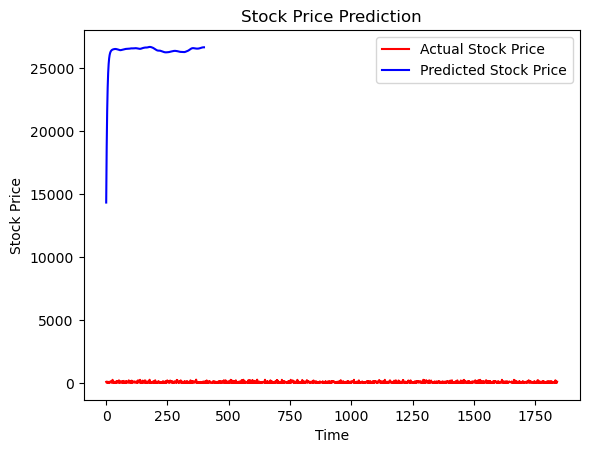

In [32]:
plt.plot(actual_stock_price,color='red',label='Actual Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')     
plt.legend()

          